# 01. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create a path to make it easier to import files
path = r'/Users/Luca2/Documents/Dropbox/Mein Mac (Air-von-Luca.fritz.box)/Desktop/World Happiness Report'

In [3]:
df_clean = pd.read_csv(os.path.join (path, '02 Data', 'Prepared Data', 'df_merged_cleaned.csv'), index_col = False)

In [4]:
df_clean.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption,Happiness Category
0,0,0,Finland,Western Europe,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,High Happiness
1,1,1,Norway,Western Europe,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,High Happiness
2,2,2,Denmark,Western Europe,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,High Happiness
3,3,3,Iceland,Western Europe,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,High Happiness
4,4,4,Switzerland,Western Europe,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,High Happiness


# 02. Data Wrangling¶

In [5]:
# Drop the not needed columns
df_clean = df_clean.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [6]:
df_clean.head()

,Country,Region,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption,Happiness Category
0,Finland,Western Europe,2018,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393,High Happiness
1,Norway,Western Europe,2018,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,High Happiness
2,Denmark,Western Europe,2018,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,High Happiness
3,Iceland,Western Europe,2018,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,High Happiness
4,Switzerland,Western Europe,2018,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,High Happiness


In [7]:
# Check for missing values
df_clean.isnull().sum()

Country                      0
Region                       0
Year                         0
Happiness Rank               0
Happiness Score              0
Economy (GDP per Capita)     0
Social Support               0
Health (Life Expectancy)     0
Freedom (Life Choices)       0
Generosity                   0
Perceptions of Corruption    0
Happiness Category           0
dtype: int64

In [8]:
# Check for duplicates 
df_dup = df_clean.duplicated()

In [9]:
# Check for irregularities
df_clean.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom (Life Choices),Generosity,Perceptions of Corruption
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,2020.427933,75.427933,5.477140,1.066179,1.074217,0.586087,0.476173,0.172272,0.131027
std,1.695204,43.433086,1.106854,0.464766,0.334215,0.247906,0.154234,0.093969,0.113284
min,2018.000000,1.000000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,38.000000,4.639500,0.758000,0.865000,0.403000,0.384000,0.103000,0.055000
50%,2020.000000,75.000000,5.510400,1.069000,1.114000,0.599000,0.496000,0.159000,0.097000
75%,2022.000000,113.000000,6.256300,1.379000,1.348033,0.779000,0.592000,0.228853,0.163193
max,2023.000000,156.000000,7.842000,2.209000,1.644000,1.141000,0.772000,0.598000,0.587000


/var/folders/qs/xk2q33w15wqbkb_xl01bt3tr0000gr/T/ipykernel_35810/3508728154.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Happiness Score'], bins = 20)


<Axes: xlabel='Happiness Score', ylabel='Density'>

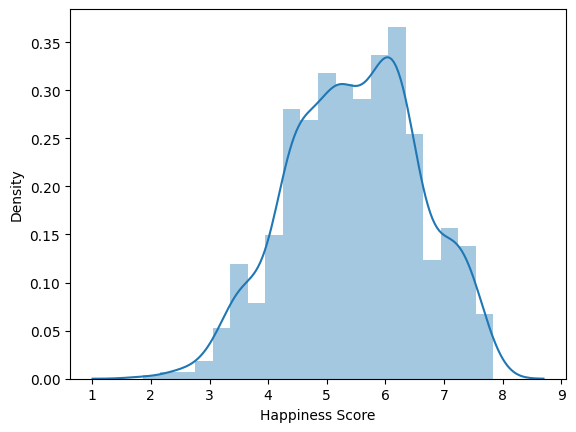

In [10]:
# Check for extreme values 
# Check for extreme values
sns.distplot(df_clean['Happiness Score'], bins = 20)

In [11]:
# Check min, mean, max

min_score = df_clean['Happiness Score'].min()
mean_score = df_clean['Happiness Score'].mean()
max_score = df_clean['Happiness Score'].max()

print("Minimum Happiness Score:", min_score)
print("Mean Happiness Score:", mean_score)
print("Maximum Happiness Score:", max_score)


Minimum Happiness Score: 1.859
Mean Happiness Score: 5.477140445827937
Maximum Happiness Score: 7.842


# 03. Data Prep for Regression Analysis

/Users/Luca2/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


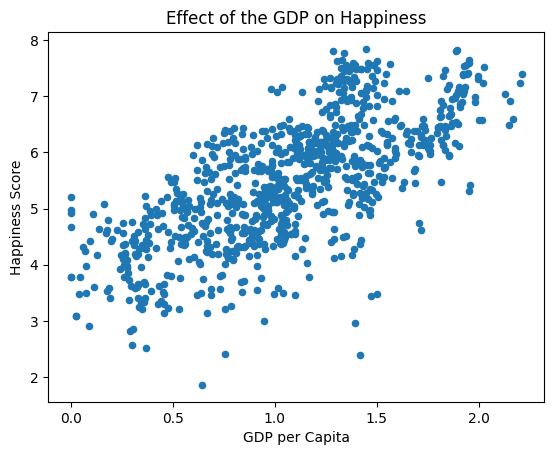

In [12]:
# Create Scatterplot for variable you want to test


df_clean.plot(x='Economy (GDP per Capita)', y='Happiness Score', kind='scatter')
plt.title('Effect of the GDP on Happiness')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


## Hypothesis: 

### If a  Country has a higher GDP per Capita, then their Happiness Score is higher.

# 04. Regression Analysis

In [13]:
# Reshape the variables we need into numpy arrays and put them into separate objects
x = df_clean['Economy (GDP per Capita)'].values.reshape(-1, 1)
y = df_clean['Happiness Score'].values.reshape(-1, 1)

In [14]:
x

array([[1.305     ],
       [1.456     ],
       [1.351     ],
       [1.343     ],
       [1.42      ],
       [1.361     ],
       [1.33      ],
       [1.268     ],
       [1.355     ],
       [1.34      ],
       [1.244     ],
       [1.341     ],
       [1.01      ],
       [1.448     ],
       [1.34      ],
       [1.324     ],
       [1.576     ],
       [1.398     ],
       [1.301     ],
       [1.233     ],
       [1.27      ],
       [1.293     ],
       [1.038     ],
       [1.131     ],
       [1.365     ],
       [1.112     ],
       [0.986     ],
       [1.073     ],
       [0.781     ],
       [1.093     ],
       [1.649     ],
       [1.379     ],
       [1.529     ],
       [1.161     ],
       [1.251     ],
       [0.96      ],
       [1.223     ],
       [1.21      ],
       [0.806     ],
       [0.668     ],
       [1.176     ],
       [1.338     ],
       [0.719     ],
       [1.474     ],
       [1.016     ],
       [1.264     ],
       [0.889     ],
       [0.807

In [15]:
y

array([[7.632     ],
       [7.594     ],
       [7.555     ],
       [7.495     ],
       [7.487     ],
       [7.441     ],
       [7.328     ],
       [7.324     ],
       [7.314     ],
       [7.272     ],
       [7.19      ],
       [7.139     ],
       [7.072     ],
       [6.977     ],
       [6.965     ],
       [6.927     ],
       [6.91      ],
       [6.886     ],
       [6.814     ],
       [6.711     ],
       [6.627     ],
       [6.489     ],
       [6.488     ],
       [6.476     ],
       [6.441     ],
       [6.43      ],
       [6.419     ],
       [6.388     ],
       [6.382     ],
       [6.379     ],
       [6.374     ],
       [6.371     ],
       [6.343     ],
       [6.322     ],
       [6.31      ],
       [6.26      ],
       [6.192     ],
       [6.173     ],
       [6.167     ],
       [6.141     ],
       [6.123     ],
       [6.105     ],
       [6.096     ],
       [6.083     ],
       [6.072     ],
       [6.        ],
       [5.973     ],
       [5.956

In [16]:
# Split the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
# Create a regression object

regression = LinearRegression ()


In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

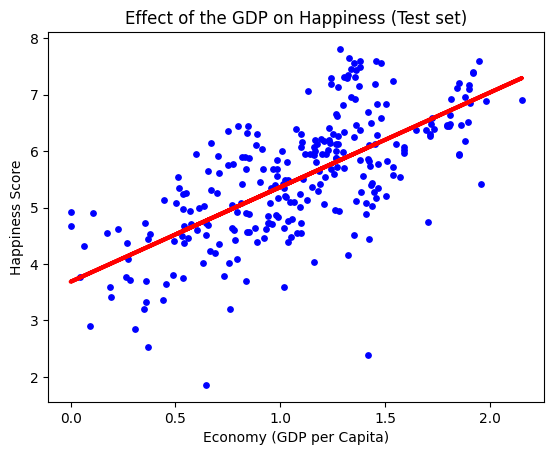

In [20]:
# Create a plot that shows the regression line on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Effect of the GDP on Happiness (Test set)')
plot_test.xlabel('Economy (GDP per Capita)')
plot_test.ylabel('Happiness Score')
plot_test.show()

## Interpretation of the line fit:

### The line appears to fit the data quite well. While there are some outliers, the majority of data points are clustered around the line. The line also seems to get the general direction of the data points right, suggesting a positive slope. This aligns with the expectation that higher GDP is associated with a higher happiness (score).

# 05. Check the Performance Statistics

In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.67477453]]
Mean squared error:  0.6569899279965644
R2 score:  0.45143492374843863


# 06. Compare the predicted values with the actual values

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,5.3420,4.554069
1,6.1490,5.759907
2,5.1318,5.574290
3,6.3710,5.996050
4,5.7220,6.260664
5,6.1730,6.840136
6,5.6840,5.763256
7,4.3940,5.424952
8,6.2550,5.947481
9,5.1010,5.475195


# 07. Interpretation of the test set

### The model performances statistics gives us some indications on how the model has fared. The positive slope score of 1.67477453 signifies, that generally an increase in 'GDP per Capita' results in an increase in 'Happiness Score.' This aligns with the hypothesis. The R-squared  score of 0.451 indicates that about 45% of the variability in 'Happiness Score' can be explained by 'GDP per Capita.' This also supports the hypothesis by stating that the "GDP per Capita" does play an important role in the 'Happiness Score'. At the same time it acknowledges that there are other factors (as the score isn't a perfect 1) that contribute to the Happiness Score. 

### The mean squared error of 0.657 is quite low, which means that the individual actual 'Happiness Scores' aren't far away from their predicted values on the line. This is an indicator of the model being a good fit. This can further be observed if you look at the actual values versus the predicted ones. While there are some outliers, most of the predicted values are quite close to the acutal ones. 

### The test is not a proof for the hypothesis, but it does indicate a significant relationship between the 'GDP per Capita' of a country and its 'Happiness Score', while also acknowledging that there are other factors that do contribute to the 'Happiness Score'.


In [24]:
df_clean.to_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'df_clean.pkl'))